In [1]:
import numpy as np


np.random.seed(42)

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [3]:
dataset = load_boston()

C:\Users\Jan\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California h

#### Einfache Lineare Regression

## Bedeutung

- $R^2$: Wie viel Streuung kann von dem Regressionsmodell erklärt werden
- coef: Steigung der Geraden
- intercept: y-Achsenabschnitt

## Symbole

- $\bar{x}$: Mittelwert von $x$
- $\bar{y}$: Mittelwert von $y$
- $\hat{y}$: Prediktion vom Modell

## Datensatz

- $m$: Anzahl an Samples
- $n$: Anzahl an Features
- $x$: Input-Daten (Features)
- $y$: Output Daten (Targets)

## Formeln

- $\beta = (X^TX)^{-1}X^Ty$
- coef = $\beta$\[1:\]
- intercept = $\beta$\[0\]
- $\hat{y} = X\beta$
- $R^2 = 1 - \frac{\sum_{i=1}^n(y_i-\hat{y})^2}{\sum_{i=1}^n(y_i-\bar{y})^2}$

In [4]:
class LinearRegression:
    def __init__(self) -> None:
        self.coef_: np.ndarray = None
        self.intercept_: np.ndarray = None

    def _add_intercept(self, x: np.ndarray) -> np.ndarray:
        intercepts = np.ones(shape=(x.shape[0]))
        x = np.column_stack((intercepts, x))
        return x

    def fit(self, x: np.ndarray, y: np.ndarray) -> None:
        x = self._add_intercept(x)
        inner = np.dot(x.T, x)
        inv = np.linalg.inv(inner)
        beta = np.dot(np.dot(inv, x.T), y)
        self.intercept_ = beta[0]
        self.coef_ = beta[1:]

    def predict(self, x: np.ndarray) -> np.ndarray:
        y_pred = np.array([np.dot(self.coef_.T, xi) + self.intercept_ for xi in x])
        return y_pred

    def score(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        y_pred = self.predict(x)
        y_mean = np.mean(y, axis=0)
        frac1 = np.sum([(y[i] - y_pred[i]) ** 2 for i in range(len(y))])
        frac2 = np.sum([(y[i] - y_mean) ** 2 for i in range(len(y))])
        r2_score = 1.0 - frac1 / frac2
        return r2_score

In [5]:
x = dataset.data[:, 5:6]
y = dataset.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [6]:
regr = LinearRegression()
regr.fit(x_train, y_train)
r2_score = regr.score(x_test, y_test)

print(f"Coef: {regr.coef_}")
print(f"Intercept: {regr.intercept_}")
print(f"R2-Score: {r2_score}")

Coef: [9.1181022]
Intercept: -34.66230743840677
R2-Score: 0.45846499343030545


#### Visualization

In [7]:
def plot_regressor(regr: LinearRegression, x_test: np.ndarray, y_test: np.ndarray) -> None:
    x1 = np.min(x) - 1
    x2 = np.max(x) + 1
    y_pred = regr.predict([x1, x2])
    y1, y2 = y_pred
    plt.plot((x1, x2), (y1, y2), color="black")
    plt.scatter(x_test, y_test, color="red")
    plt.show()

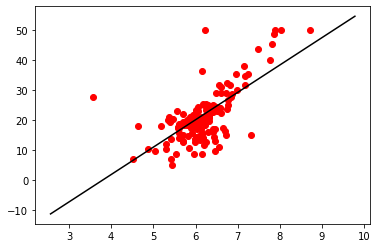

In [8]:
plot_regressor(regr, x_test, y_test)

In [9]:
def plot_residuals(
    regr: LinearRegression,
    x_train: np.ndarray,
    y_train: np.ndarray,
    x_test: np.ndarray,
    y_test: np.ndarray,
) -> None:
    y_pred_train = regr.predict(x_train)
    y_pred_test = regr.predict(x_test)

    min_val = min(np.min(y_pred_train), np.min(y_pred_test))
    max_val = max(np.max(y_pred_train), np.max(y_pred_test))

    plt.scatter(y_pred_train, y_pred_train - y_train, color="blue")
    plt.scatter(y_pred_test, y_pred_test - y_test, color="red")
    plt.hlines(y=0, xmin=min_val, xmax=max_val)
    plt.legend(["Train", "Test"])
    plt.show()

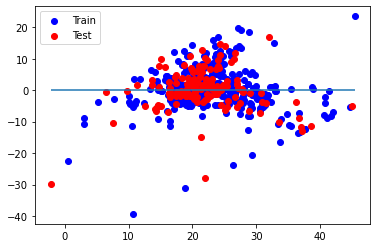

In [10]:
plot_residuals(regr, x_train, y_train, x_test, y_test)